### Downloading Packages

In [4]:
import matplotlib.pyplot as p
import numpy as np
from numpy import random
import sys
!conda install --yes --prefix {sys.prefix} sympy
from sympy import *
import scipy as sc
init_printing() # for pretty-printing equations etc
from scipy import integrate

Solving environment: ...working... done

# All requested packages already installed.



### 2-Species Models
#### Model 1
From whiteboard last week.

In [14]:
r_m1, N1, N2, a11, a12 = var("r_m1, N1, N2, a11, a12")
r_m1*N1 + a11*N1 + a12*N2

(10000, 2)


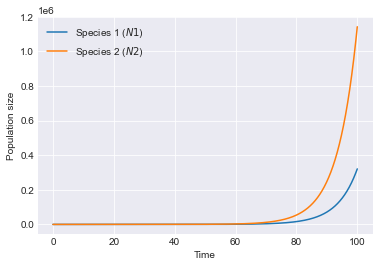

In [65]:
t_vec = np.arange(0, 100., 0.01)
#parameters
r_m1 = 0.1
r_m2 = 0.2
a = np.array([[-0.02,0.02],[-0.06,-0.03]])
#initial condition
N10N20 = np.array([1.,1.])

def LV(N1N2, t, r_m1, r_m2, a):
    return np.array([r_m1*N1N2[0] + a[0][0]*N1N2[0] + a[0][1]*N1N2[1], r_m2*N1N2[1] + a[1][0]*N1N2[0] + a[1][1]*N1N2[1]])

N1N2_vec = integrate.odeint(LV, N10N20, t_vec, (r_m1, r_m2, a))

print(N1N2_vec.shape)
p.style.use('seaborn-darkgrid')
p.plot(t_vec, N1N2_vec)
p.xlabel('Time')
p.ylabel('Population size')
p.legend(['Species 1 ($N1$)', 'Species 2 ($N2$)'], loc='best')

The carrying capacity in this model doesn't work.

#### Model 2
Based on predator-prey model.

In [15]:
r_m1, N1, N2, a11, a12 = var("r_m1, N1, N2, a11, a12")
r_m1*N1 + a11*N1**2 + a12*N2

(10000, 2)


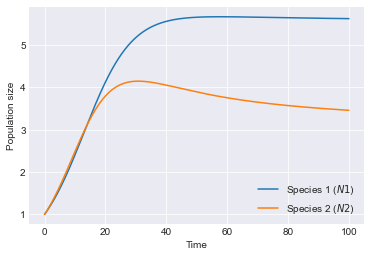

In [66]:
t_vec = np.arange(0, 100., 0.01)
#parameters
r_m1 = 0.1
r_m2 = 0.2
a = np.array([[-0.02,0.02],[-0.06,-0.03]])
#initial condition
N10N20 = np.array([1.,1.])

def LV(N1N2, t, r_m1, r_m2, a):
    return np.array([r_m1*N1N2[0] + a[0][0]*N1N2[0]**2 + a[0][1]*N1N2[1], r_m2*N1N2[1] + a[1][0]*N1N2[0] + a[1][1]*N1N2[1]**2])

N1N2_vec = integrate.odeint(LV, N10N20, t_vec, (r_m1, r_m2, a))

print(N1N2_vec.shape)
p.style.use('seaborn-darkgrid')
p.plot(t_vec, N1N2_vec)
p.xlabel('Time')
p.ylabel('Population size')
p.legend(['Species 1 ($N1$)', 'Species 2 ($N2$)'], loc='best')

Here, the carrying capacity seems to work but not for all parameter values. If the population size drops below 0 (which shouldn't happen anyway), there is an error message.

#### Model 3
Based on Pawar paper.

In [16]:
r_m1, N1, N2, a11, a12 = var("r_m1, N1, N2, a11, a12")
N1*(r_m1 + a11*N1 + a12*N2)

(10000, 2)


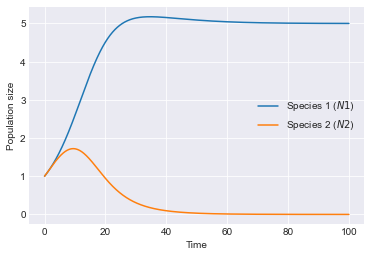

In [67]:
t_vec = np.arange(0, 100., 0.01)
#parameters
r_m1 = 0.1
r_m2 = 0.2
a = np.array([[-0.02,0.02],[-0.06,-0.03]])
#initial condition
N10N20 = np.array([1.,1.])

def LV(N1N2, t, r_m1, r_m2, a):
    return np.array([N1N2[0]*(r_m1 + a[0][0]*N1N2[0] + a[0][1]*N1N2[1]), N1N2[1]*(r_m2 + a[1][0]*N1N2[0] + a[1][1]*N1N2[1])])

N1N2_vec = integrate.odeint(LV, N10N20, t_vec, (r_m1, r_m2, a))

print(N1N2_vec.shape)
p.style.use('seaborn-darkgrid')
p.plot(t_vec, N1N2_vec)
p.xlabel('Time')
p.ylabel('Population size')
p.legend(['Species 1 ($N1$)', 'Species 2 ($N2$)'], loc='best')

This model works well for all parameter values and the population size never drops below 0. Here, the interaction strenght between the two species depends on the abundance of both species.

Evaluation of model 3:

In [8]:
r_m1, r_m2, N1, N2, a11, a12, a21, a22, t = var("r_m1, r_m2, N1, N2, a11, a12, a21, a22, t", real = True)


In [9]:
dN1_dt = N1*(r_m1 + a11*N1 + a12*N2)
dN2_dt = N2*(r_m2 + a21*N1 + a22*N2)

N1_eqlb = Eq(dN1_dt,0)
N2_eqlb = Eq(dN2_dt,0)

N1_eqlb, N2_eqlb

In [10]:
N1_eqlb_sol = solve(N1_eqlb, N2)
N2_eqlb_sol = solve(N2_eqlb, N1)

N1_eqlb_sol, N2_eqlb_sol

#### Model 4
Based on Tom's code
- this doesn't work yet, I am stuck with the last 3 lines. Using the dictionary should work, but didn't use it just yet.

In [35]:
#using DifferentialEquations, Plots
#define parameters
Nsp = 10
#growth rates
r = np.ones(Nsp)
#interactions
a = -random.rand(Nsp,Nsp)
for i in range(Nsp):
    a[i][i] = -1.0 #Diagonals = -1

In [21]:
#create dictionary
p = {'Nsp' : Nsp,
     'r' : r,
     'a' : a}

In [60]:
def du(u,t,Nsp, r, a, d):
    for i in range(Nsp):
        d[i] = u[i] * r[i]
        for j in range(Nsp):
            d[i] = d[i] + u[i] * u[j] * a[i,j]

#simulation parameters
d = np.zeros(Nsp)
u0 = np.ones(Nsp)
tspan = np.arange(0.,10., 0.01)

#define ODEproblem
prob = integrate.odeint(du, u0, tspan, (Nsp, r, a, d))
#solve
sol = solve(prob)
#plot result
plot(sol)

RuntimeError: The size of the array returned by func (1) does not match the size of y0 (10).

#### Model 5
Based on a Lotka-Volterra paper (Burns and Lester, 2008)

In [17]:
r_m1, N1, N2, a11, a12 = var("r_m1, N1, N2, a11, a12")
N1*r_m1*(1 + a11*N1 + a12*N2)

(10000, 2)


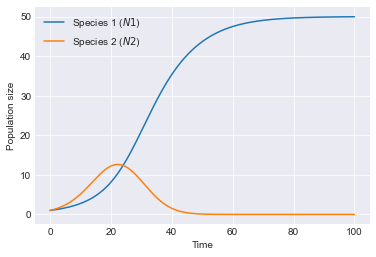

In [106]:
t_vec = np.arange(0, 100., 0.01)
#parameters
r_m1 = 0.1
r_m2 = 0.2
a = np.array([[-0.02,0.02],[-0.06,-0.03]])
#initial condition
N10N20 = np.array([1.,1.])

def LV(N1N2, t, r_m1, r_m2, a):
    return np.array([N1N2[0]*r_m1*(1 + a[0][0]*N1N2[0] + a[0][1]*N1N2[1]), N1N2[1]*r_m2*(1 + a[1][0]*N1N2[0] + a[1][1]*N1N2[1])])

N1N2_vec = integrate.odeint(LV, N10N20, t_vec, (r_m1, r_m2, a))

print(N1N2_vec.shape)
p.style.use('seaborn-darkgrid')
p.plot(t_vec, N1N2_vec)
p.xlabel('Time')
p.ylabel('Population size')
p.legend(['Species 1 ($N1$)', 'Species 2 ($N2$)'], loc='best')

Works but look a bit different. Is model 3 or model 5 best? Is there a difference? Because when I calculate the solution at equilibrium, I get the same for models 3 and 5.

### Sum function for multi-species model

In [68]:
n = np.array([10,5])
b = np.array([[1,2],[3,4]]) #always square because all species interact with each other

def sumf(Competition, Species, i):
    x = 0
    for j in range(len(Species)):
        x = x + Competition[i][j]*Species[j]
    return(x)


sumf(b, n, 0)
    

20

Implement sumf into simulation:

(10000, 2)


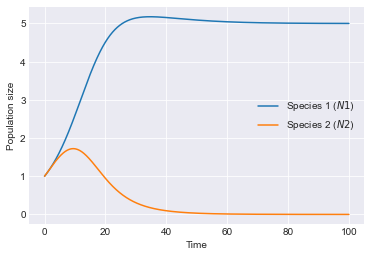

In [69]:
t_vec = np.arange(0, 100., 0.01)
#parameters
r_m1 = 0.1
r_m2 = 0.2
a = np.array([[-0.02,0.02],[-0.06,-0.03]])
#initial condition
N10N20 = np.array([1.,1.])

def LV(N1N2, t, r_m1, r_m2, a):
    return np.array([N1N2[0]*(r_m1 + sumf(a, N1N2, 0)), N1N2[1]*(r_m2 + sumf(a, N1N2, 1))])

N1N2_vec = integrate.odeint(LV, N10N20, t_vec, (r_m1, r_m2, a))

print(N1N2_vec.shape)
p.style.use('seaborn-darkgrid')
p.plot(t_vec, N1N2_vec)
p.xlabel('Time')
p.ylabel('Population size')
p.legend(['Species 1 ($N1$)', 'Species 2 ($N2$)'], loc='best')

Automatically create as many ODEs as species:

(10000, 2)


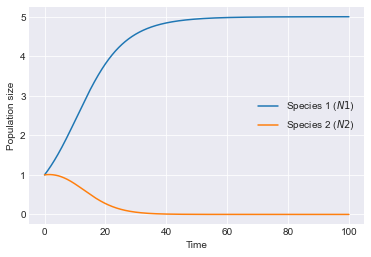

In [70]:
t_vec = np.arange(0, 100., 0.01)
#parameters
r_m1 = 0.1
r_m2 = 0.2
a = np.array([[-0.02,0.02],[-0.06,-0.03]])
Species = len(a)
#initial condition
N10N20 = np.ones(Species)

def LV(N1N2, t, r_m1, r_m2, a):
    dN_dt = np.empty(Species)
    for i in range(Species):
        dN_dt[i] = N1N2[i]*(r_m1 + sumf(a, N1N2, i))
    return dN_dt

N1N2_vec = integrate.odeint(LV, N10N20, t_vec, (r_m1, r_m2, a))

print(N1N2_vec.shape)
p.style.use('seaborn-darkgrid')
p.plot(t_vec, N1N2_vec)
p.xlabel('Time')
p.ylabel('Population size')
p.legend(['Species 1 ($N1$)', 'Species 2 ($N2$)'], loc='best')

The only things that have to be defined at the beginning now are:
- r_m1 for all species
- Interaction Matrix a

### Multi Species Model
##### Model 3

(10000, 3)


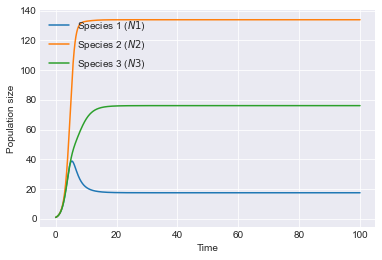

In [109]:
t_vec = np.arange(0, 100., 0.01)
#parameters
r_m = np.array([1,1,1])
a = np.array([[-0.01,-0.009, 0.005],
              [0.003,-0.009, 0.002],
              [-0.007, -0.002, -0.008]])
Species = len(a)
#initial condition
N10N20 = np.ones(Species)

def LV(N1N2, t, r_m2, a):
    dN_dt = np.empty(Species)
    for i in range(Species):
        dN_dt[i] = N1N2[i]*(r_m[i] + sumf(a, N1N2, i))
    return dN_dt

N1N2_vec = integrate.odeint(LV, N10N20, t_vec, (r_m, a))

print(N1N2_vec.shape)
p.style.use('seaborn-darkgrid')
p.plot(t_vec, N1N2_vec)
p.xlabel('Time')
p.ylabel('Population size')
p.legend(['Species 1 ($N1$)', 'Species 2 ($N2$)', 'Species 3 ($N3$)'], loc='best')

Seems to work. The values in a (off-diagonal) cannot be much larger than the values on the diagonal.

##### Model 5

(10000, 3)


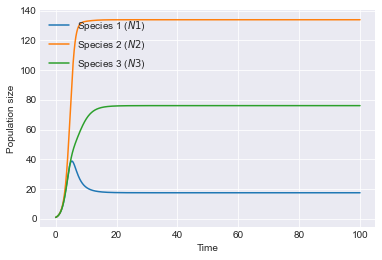

In [108]:
t_vec = np.arange(0, 100., 0.01)
#parameters
r_m = np.array([1,1,1])
a = np.array([[-0.01,-0.009, 0.005],
              [0.003,-0.009, 0.002],
              [-0.007, -0.002, -0.008]])
Species = len(a)
#initial condition
N10N20 = np.ones(Species)

def LV(N1N2, t, r_m2, a):
    dN_dt = np.empty(Species)
    for i in range(Species):
        dN_dt[i] = N1N2[i]*r_m[i]*(1 + sumf(a, N1N2, i))
    return dN_dt

N1N2_vec = integrate.odeint(LV, N10N20, t_vec, (r_m, a))

print(N1N2_vec.shape)
p.style.use('seaborn-darkgrid')
p.plot(t_vec, N1N2_vec)
p.xlabel('Time')
p.ylabel('Population size')
p.legend(['Species 1 ($N1$)', 'Species 2 ($N2$)', 'Species 3 ($N3$)'], loc='best')

With 3 species, models 3 and 5 seem to look the same.

5 species, model 5:

(10000, 5)
[[-1.00000000e-02 -2.53430911e-03 -3.32567139e-03 -1.00556407e-03
  -4.34511387e-03]
 [-1.45055296e-03 -1.00000000e-02  2.43376796e-03  1.33437172e-03
  -4.25523758e-03]
 [-9.46962628e-04  2.32846947e-03 -1.00000000e-02 -3.18034976e-03
  -1.74993700e-03]
 [-9.64210750e-05 -1.19306286e-03 -2.73012723e-03 -1.00000000e-02
  -2.55119638e-03]
 [-2.21554995e-03  2.53126672e-04  3.19547507e-03  1.81178471e-03
  -1.00000000e-02]]


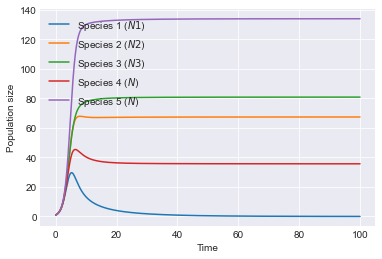

In [137]:
t_vec = np.arange(0, 100., 0.01)
#parameters
r_m = np.array([1,1,1,1,1])
#a = np.zeros((5,5))
a = (random.rand(5,5)-0.5)/100
for i in range(5):
    a[i][i] = -0.01 #Diagonals = -1

Species = len(a)
#initial condition
N10N20 = np.ones(Species)

def LV(N1N2, t, r_m2, a):
    dN_dt = np.empty(Species)
    for i in range(Species):
        dN_dt[i] = N1N2[i]*r_m[i]*(1 + sumf(a, N1N2, i))
    return dN_dt

N1N2_vec = integrate.odeint(LV, N10N20, t_vec, (r_m, a))

print(N1N2_vec.shape)
print(a)
p.style.use('seaborn-darkgrid')
p.plot(t_vec, N1N2_vec)
p.xlabel('Time')
p.ylabel('Population size')
p.legend(['Species 1 ($N1$)', 'Species 2 ($N2$)', 'Species 3 ($N3$)', 'Species 4 ($N$)', 'Species 5 ($N$)'], loc='best')